In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math

In [2]:
df = pd.read_csv('Banglish EDA.csv',encoding= 'unicode_escape')

In [3]:
df.head

<bound method NDFrame.head of       Emotion                                               text
0         sad  hefajoter pokkhe michil theke hamlay ahoto awa...
1       angry         e chara mask chara probesh korte dicchi na
2     disgust  vore uthe batch porano college e class neya ab...
3       angry                             eita pata chagler kach
4     disgust                         sob dalal diye vore geche!
...       ...                                                ...
7606     fear  tbe sakoti niymit sngskar na koray bortomane e...
7607    angry                            amar oporadh ami hindu 
7608    angry  apnara kiser zukti niye bolechen amar sudhu ek...
7609     fear                   ar baki sob hotta mene neya zay!
7610    angry  BNP kkhn khomotay ashole eder ki hobe? eder ke...

[7611 rows x 2 columns]>

In [4]:
df.groupby("Emotion").describe()

text                                                               
         count unique                                                top freq
Emotion                                                                      
angry     1272    881  jonogon vot kendre zayni odhikangs manusher sh...    6
disgust   1196    628  mzadam sekh hasina khali hate firechen ta khar...    9
fear      1231    586  ete bojha gel ze khmotoay tike thakar jonno do...   11
happy     1305    913                                         dhonnobaad   10
sad       1288   1051  shontaner sob khrc dile ki shontaner bap hoya ...    5
surprise  1319    648       cheler biyete ma jante parlen kone tar meye!   11

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import LabelBinarizer

In [6]:
count_vect = CountVectorizer() # for converting text into count-based vectors
tfidf_transformer = TfidfTransformer() # for converting text into tf-idf-based vectors
lb = LabelBinarizer() # object for making class-labels into binary numbers

In [7]:
df.columns

Index(['Emotion', 'text'], dtype='object')

In [8]:
df.head

<bound method NDFrame.head of       Emotion                                               text
0         sad  hefajoter pokkhe michil theke hamlay ahoto awa...
1       angry         e chara mask chara probesh korte dicchi na
2     disgust  vore uthe batch porano college e class neya ab...
3       angry                             eita pata chagler kach
4     disgust                         sob dalal diye vore geche!
...       ...                                                ...
7606     fear  tbe sakoti niymit sngskar na koray bortomane e...
7607    angry                            amar oporadh ami hindu 
7608    angry  apnara kiser zukti niye bolechen amar sudhu ek...
7609     fear                   ar baki sob hotta mene neya zay!
7610    angry  BNP kkhn khomotay ashole eder ki hobe? eder ke...

[7611 rows x 2 columns]>

In [9]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["Label"] = lb_make.fit_transform(df["Emotion"])
df[["Emotion", "Label"]].head(11)



,Emotion,Label
0,sad,4
1,angry,0
2,disgust,1
3,angry,0
4,disgust,1
5,sad,4
6,sad,4
7,fear,2
8,surprise,5
9,disgust,1


In [10]:
df

,Emotion,text,Label
0,sad,hefajoter pokkhe michil theke hamlay ahoto awa...,4
1,angry,e chara mask chara probesh korte dicchi na,0
2,disgust,vore uthe batch porano college e class neya ab...,1
3,angry,eita pata chagler kach,0
4,disgust,sob dalal diye vore geche!,1
...,...,...,...
7606,fear,tbe sakoti niymit sngskar na koray bortomane e...,2
7607,angry,amar oporadh ami hindu,0
7608,angry,apnara kiser zukti niye bolechen amar sudhu ek...,0
7609,fear,ar baki sob hotta mene neya zay!,2


In [11]:
df.isnull()

,Emotion,text,Label
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
7606,False,False,False
7607,False,False,False
7608,False,False,False
7609,False,False,False


In [12]:
df.dropna(inplace=True)

In [13]:
df

,Emotion,text,Label
0,sad,hefajoter pokkhe michil theke hamlay ahoto awa...,4
1,angry,e chara mask chara probesh korte dicchi na,0
2,disgust,vore uthe batch porano college e class neya ab...,1
3,angry,eita pata chagler kach,0
4,disgust,sob dalal diye vore geche!,1
...,...,...,...
7606,fear,tbe sakoti niymit sngskar na koray bortomane e...,2
7607,angry,amar oporadh ami hindu,0
7608,angry,apnara kiser zukti niye bolechen amar sudhu ek...,0
7609,fear,ar baki sob hotta mene neya zay!,2


In [14]:
text = df['text'].values.tolist()

In [15]:
df.groupby("Emotion").describe()

Label                                   
           count mean  std  min  25%  50%  75%  max
Emotion                                            
angry     1272.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
disgust   1196.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
fear      1231.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0
happy     1305.0  3.0  0.0  3.0  3.0  3.0  3.0  3.0
sad       1288.0  4.0  0.0  4.0  4.0  4.0  4.0  4.0
surprise  1319.0  5.0  0.0  5.0  5.0  5.0  5.0  5.0

In [16]:
df["Emotion"].value_counts()

surprise    1319
happy       1305
sad         1288
angry       1272
fear        1231
disgust     1196
Name: Emotion, dtype: int64

C:\Users\moshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


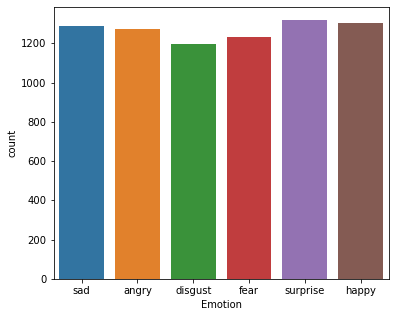

In [17]:
plt.subplots(figsize=(6,5))
sns.countplot(df["Emotion"])
plt.show()

In [18]:
longest_string = max(df["text"], key=len)
print(len(longest_string))

1889


In [19]:
text = df["text"]

In [20]:
train_counts = count_vect.fit_transform(text) # converting docs into vectors
train_tfidf  = train_counts 
#train_tfidf = tfidf_transformer.fit_transform(train_counts) # converting transformed vectors into tf-idf vectors
train_tfidf.shape

(7611, 13107)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(train_tfidf, df['Label'], test_size=0.2, random_state=42)

Y_pre = df['Emotion']
target_names = list(set(Y_pre))

In [23]:
target_names

['happy', 'disgust', 'fear', 'sad', 'surprise', 'angry']

In [24]:
X_train

<6088x13107 sparse matrix of type '<class 'numpy.int64'>'
	with 77798 stored elements in Compressed Sparse Row format>

In [25]:
y_train

4995    4
3263    3
4906    5
2855    1
4715    4
       ..
5226    3
5390    5
860     3
7603    5
7270    5
Name: Label, Length: 6088, dtype: int32

In [26]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix, accuracy_score

In [27]:
import seaborn as sn

Test set accuracy 0.5915955351280368
              precision    recall  f1-score   support

       happy       0.52      0.61      0.56       251
     disgust       0.52      0.62      0.57       209
        fear       0.68      0.68      0.68       233
         sad       0.68      0.64      0.66       255
    surprise       0.51      0.44      0.48       283
       angry       0.64      0.59      0.62       292

    accuracy                           0.59      1523
   macro avg       0.59      0.60      0.59      1523
weighted avg       0.60      0.59      0.59      1523



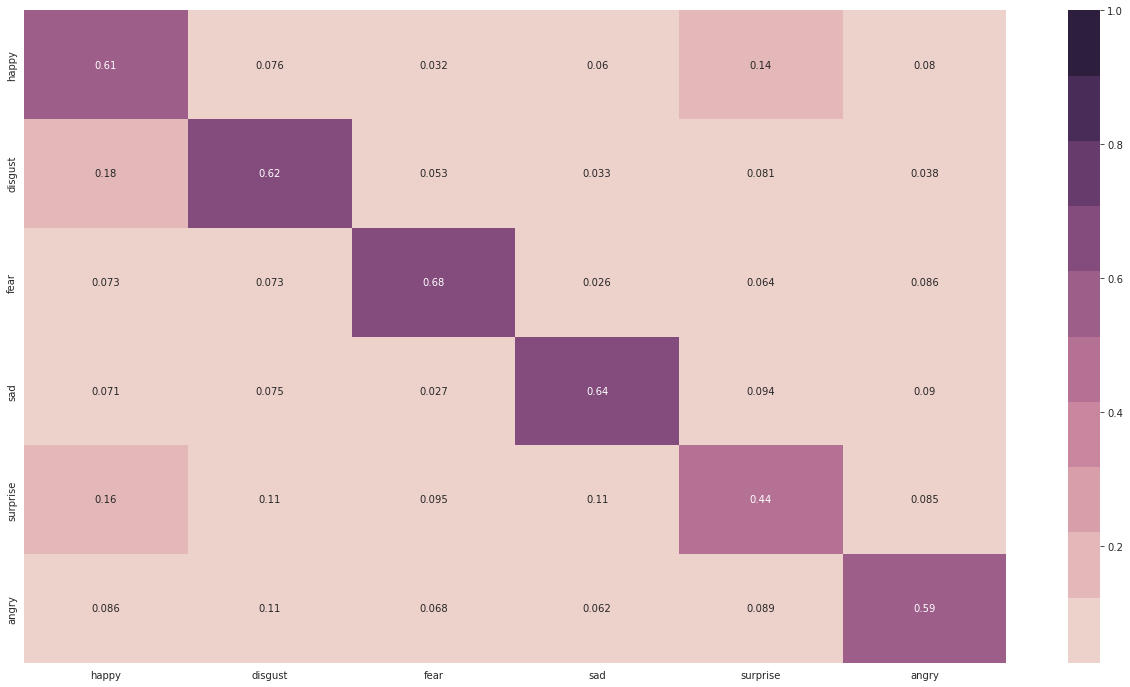

In [28]:
classifer = MultinomialNB()
classifer.fit(X_train, y_train)
y_pred = classifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()
  

In [29]:
from sklearn.svm import SVC

Test set accuracy 0.6730137885751806
              precision    recall  f1-score   support

       happy       0.62      0.61      0.62       251
     disgust       0.68      0.74      0.70       209
        fear       0.70      0.76      0.73       233
         sad       0.69      0.74      0.72       255
    surprise       0.60      0.47      0.52       283
       angry       0.73      0.75      0.74       292

    accuracy                           0.67      1523
   macro avg       0.67      0.68      0.67      1523
weighted avg       0.67      0.67      0.67      1523



C:\Users\moshi\AppData\Local\Temp/ipykernel_8616/3122129258.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cm = (cm.T / cm.astype(np.float).sum(axis=1)).T


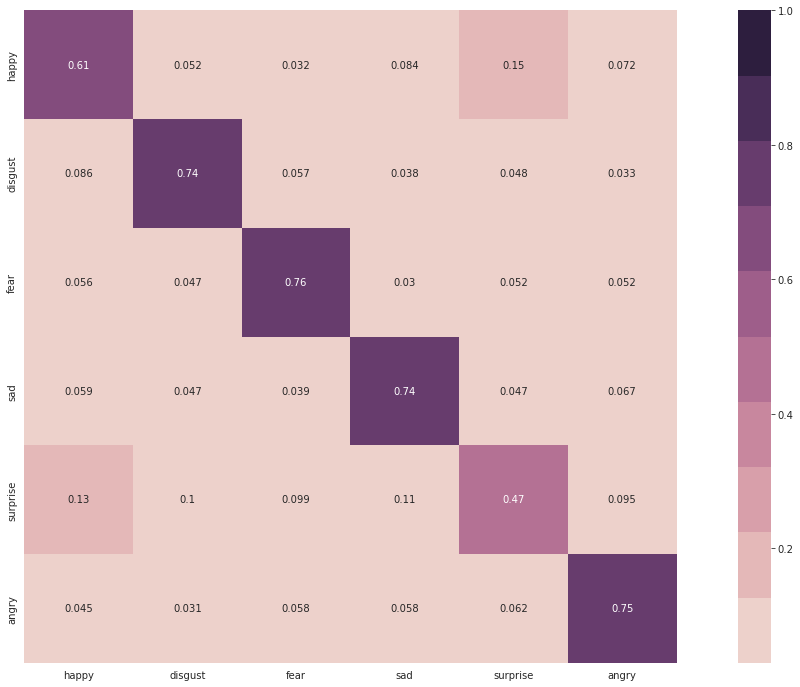

In [30]:
classifer = SVC(kernel='linear')
classifer.fit(X_train, y_train)
y_pred = classifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(np.float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1, square=True, cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()


In [31]:
from xgboost import XGBClassifier

C:\Users\moshi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:48:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Test set accuracy 0.5495732107682206
              precision    recall  f1-score   support

       happy       0.55      0.51      0.53       251
     disgust       0.64      0.52      0.58       209
        fear       0.70      0.58      0.64       233
         sad       0.59      0.60      0.60       255
    surprise       0.46      0.41      0.43       283
       angry       0.47      0.66      0.55       292

    accuracy                           0.55      1523
   macro avg       0.57      0.55      0.55      1523
weighted avg       0.56      0.55      0.55      1523



C:\Users\moshi\AppData\Local\Temp/ipykernel_8616/2874889585.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cm = (cm.T / cm.astype(np.float).sum(axis=1)).T


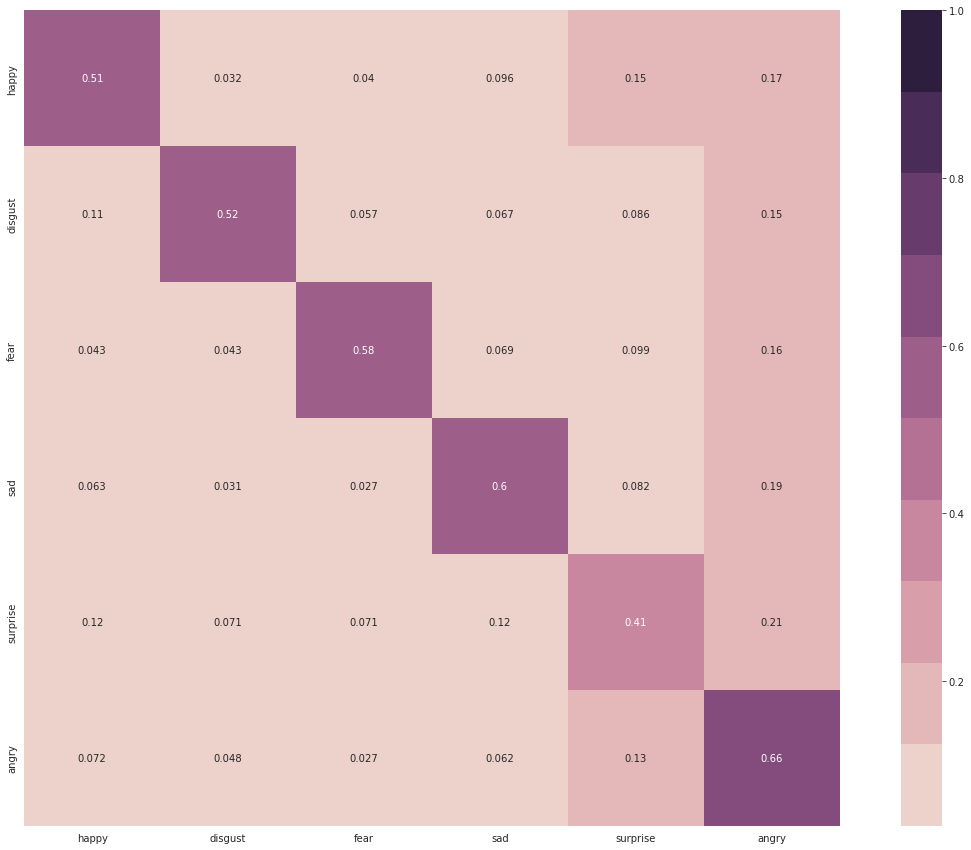

In [32]:
classifer = XGBClassifier()
classifer.fit(X_train, y_train)
y_pred = classifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(np.float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,15))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1, square=True, cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()


In [33]:
from sklearn.ensemble import AdaBoostClassifier


Test set accuracy 0.29678266579120155
              precision    recall  f1-score   support

       happy       0.32      0.16      0.22       251
     disgust       0.21      0.09      0.13       209
        fear       0.49      0.24      0.32       233
         sad       0.50      0.27      0.35       255
    surprise       0.27      0.19      0.22       283
       angry       0.25      0.74      0.37       292

    accuracy                           0.30      1523
   macro avg       0.34      0.28      0.27      1523
weighted avg       0.34      0.30      0.27      1523



C:\Users\moshi\AppData\Local\Temp/ipykernel_8616/215097931.py:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cm = (cm.T / cm.astype(np.float).sum(axis=1)).T


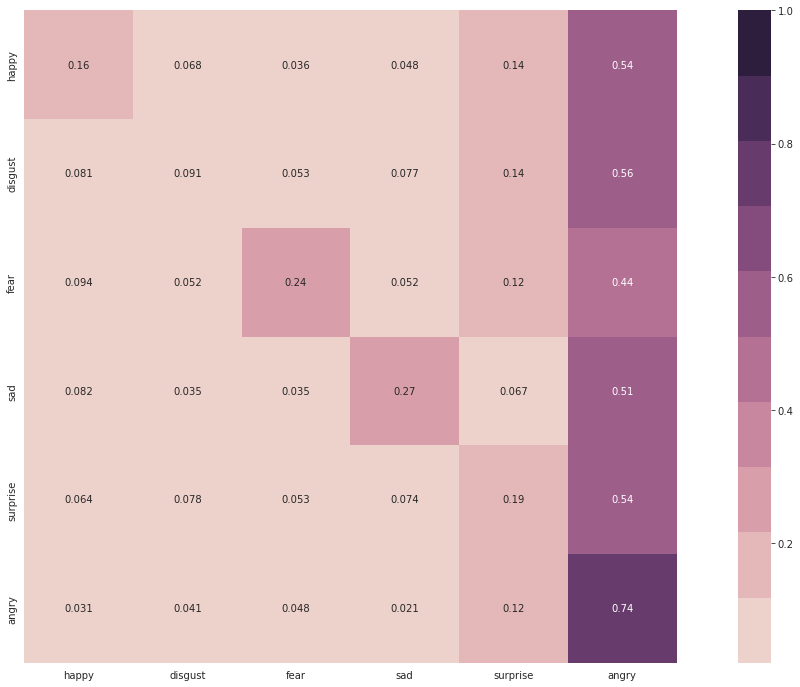

In [34]:
classifer = AdaBoostClassifier(n_estimators=60,
                         learning_rate=1)
classifer.fit(X_train, y_train)
y_pred = classifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(np.float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1, square=True, cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()


In [35]:
from sklearn.tree import DecisionTreeClassifier

Test set accuracy 0.6539724228496389
              precision    recall  f1-score   support

       happy       0.60      0.54      0.57       251
     disgust       0.71      0.72      0.72       209
        fear       0.73      0.76      0.75       233
         sad       0.72      0.69      0.70       255
    surprise       0.52      0.46      0.49       283
       angry       0.66      0.77      0.71       292

    accuracy                           0.65      1523
   macro avg       0.66      0.66      0.66      1523
weighted avg       0.65      0.65      0.65      1523



C:\Users\moshi\AppData\Local\Temp/ipykernel_8616/37561862.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cm = (cm.T / cm.astype(np.float).sum(axis=1)).T


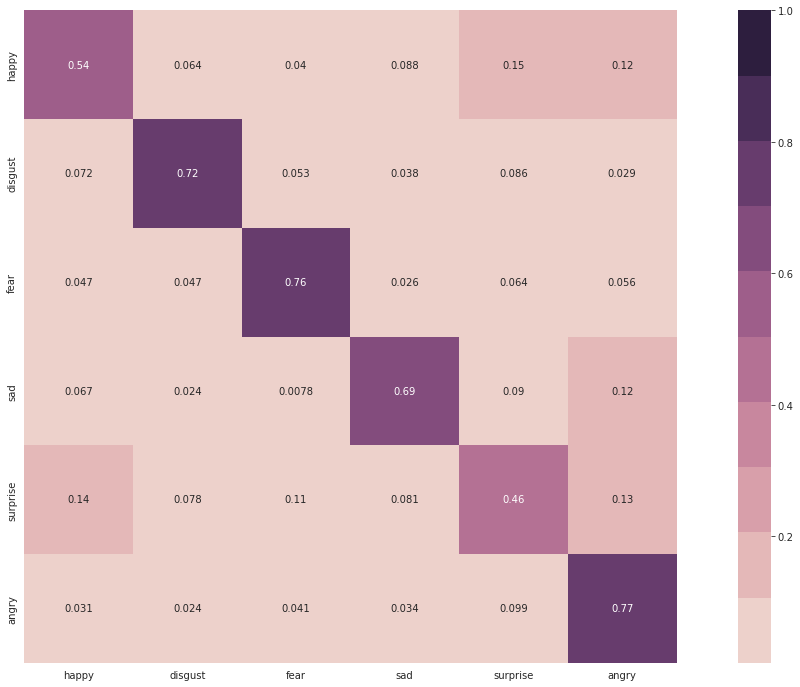

In [36]:
classifer = DecisionTreeClassifier()
classifer.fit(X_train, y_train)
y_pred = classifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(np.float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1, square=True, cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()


In [37]:
from sklearn.ensemble import RandomForestClassifier

Test set accuracy 0.6795797767564018
              precision    recall  f1-score   support

       happy       0.65      0.58      0.62       251
     disgust       0.80      0.70      0.74       209
        fear       0.79      0.77      0.78       233
         sad       0.68      0.76      0.72       255
    surprise       0.57      0.46      0.51       283
       angry       0.63      0.82      0.71       292

    accuracy                           0.68      1523
   macro avg       0.69      0.68      0.68      1523
weighted avg       0.68      0.68      0.68      1523



C:\Users\moshi\AppData\Local\Temp/ipykernel_8616/519492484.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cm = (cm.T / cm.astype(np.float).sum(axis=1)).T


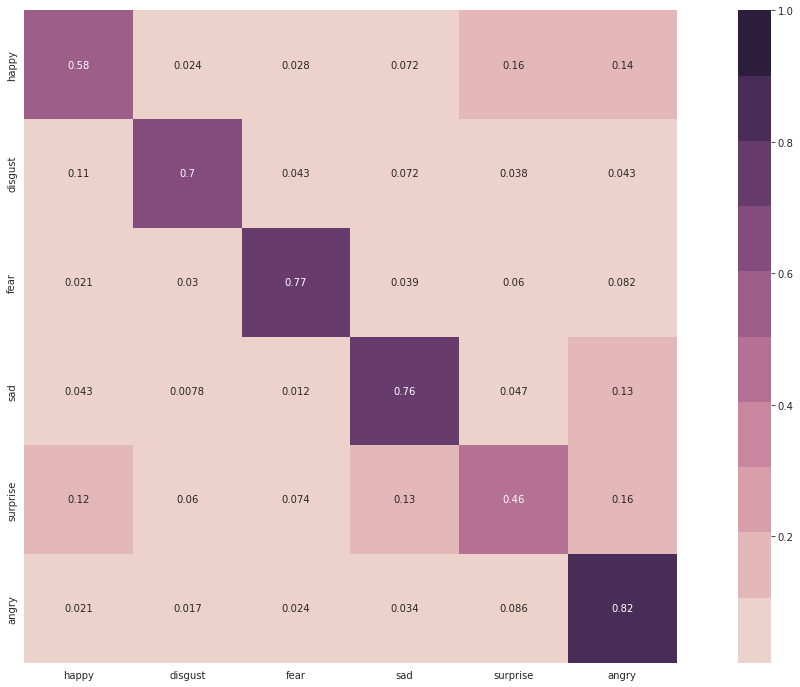

In [38]:
classifer = RandomForestClassifier(n_estimators=100)
shapas = classifer.fit(X_train, y_train)
y_pred = classifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(np.float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1, square=True, cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()


In [39]:
from sklearn.linear_model import SGDClassifier

Test set accuracy 0.670387393302692
              precision    recall  f1-score   support

       happy       0.64      0.61      0.62       251
     disgust       0.68      0.73      0.71       209
        fear       0.72      0.76      0.74       233
         sad       0.71      0.75      0.73       255
    surprise       0.56      0.46      0.50       283
       angry       0.69      0.74      0.72       292

    accuracy                           0.67      1523
   macro avg       0.67      0.68      0.67      1523
weighted avg       0.67      0.67      0.67      1523



C:\Users\moshi\AppData\Local\Temp/ipykernel_8616/2839143634.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cm = (cm.T / cm.astype(np.float).sum(axis=1)).T


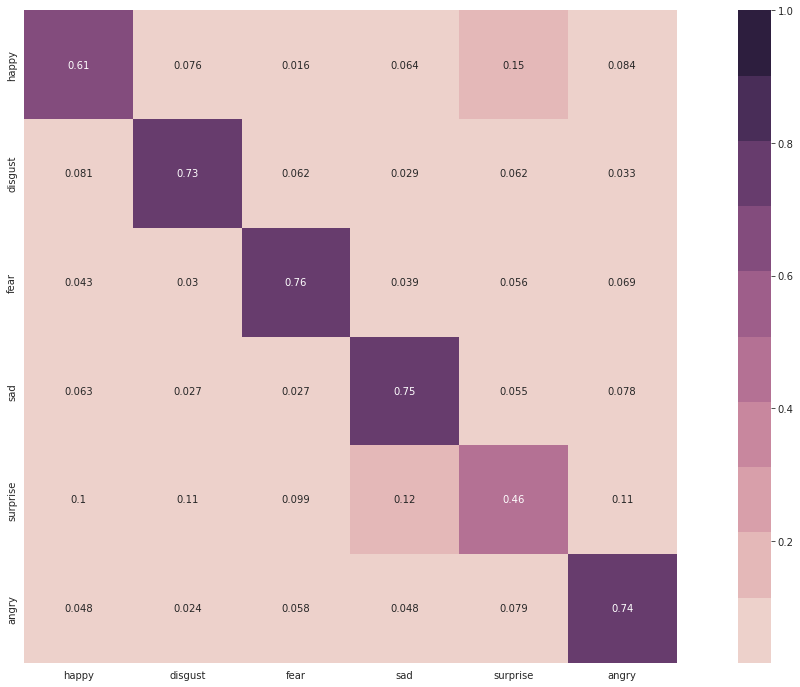

In [40]:
classifer = SGDClassifier()
classifer.fit(X_train, y_train)
y_pred = classifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(np.float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1, square=True, cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()


In [41]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier

Test set accuracy 0.5627051871306632
              precision    recall  f1-score   support

       happy       0.40      0.62      0.48       251
     disgust       0.72      0.60      0.65       209
        fear       0.70      0.71      0.70       233
         sad       0.56      0.66      0.61       255
    surprise       0.69      0.15      0.25       283
       angry       0.56      0.67      0.61       292

    accuracy                           0.56      1523
   macro avg       0.60      0.57      0.55      1523
weighted avg       0.60      0.56      0.54      1523



C:\Users\moshi\AppData\Local\Temp/ipykernel_8616/4185345786.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cm = (cm.T / cm.astype(np.float).sum(axis=1)).T


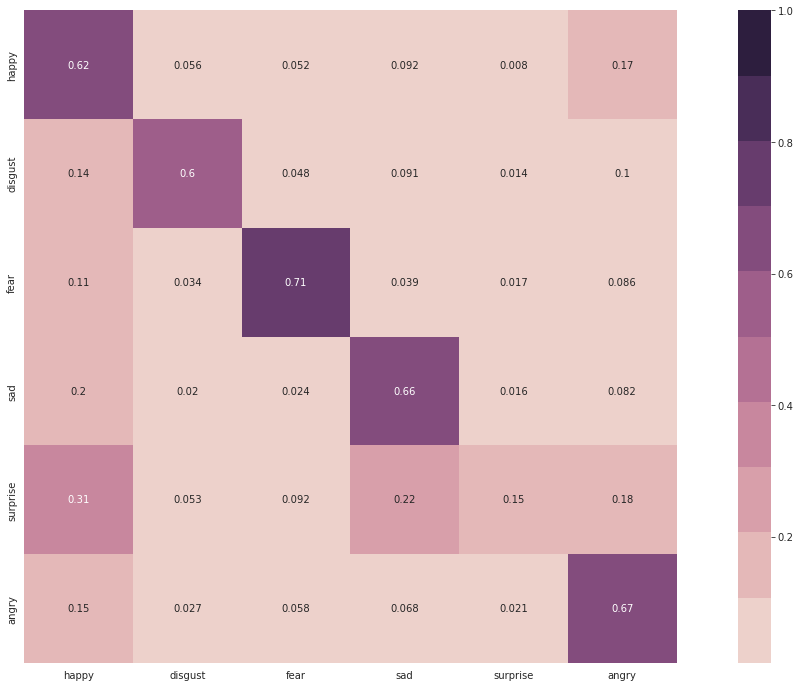

In [42]:
classifer = KNeighborsClassifier(n_neighbors=3)
classifer.fit(X_train, y_train)
y_pred = classifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(np.float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1, square=True, cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()


In [43]:
from sklearn.linear_model import LogisticRegression

C:\Users\moshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\moshi\AppData\Local\Temp/ipykernel_8616/3294884351.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cm = (cm.T / cm.astype(np.float).sum(axis=1

Test set accuracy 0.6749835850295469
              precision    recall  f1-score   support

       happy       0.64      0.61      0.62       251
     disgust       0.67      0.72      0.69       209
        fear       0.73      0.75      0.74       233
         sad       0.70      0.76      0.73       255
    surprise       0.58      0.47      0.52       283
       angry       0.71      0.75      0.73       292

    accuracy                           0.67      1523
   macro avg       0.67      0.68      0.67      1523
weighted avg       0.67      0.67      0.67      1523



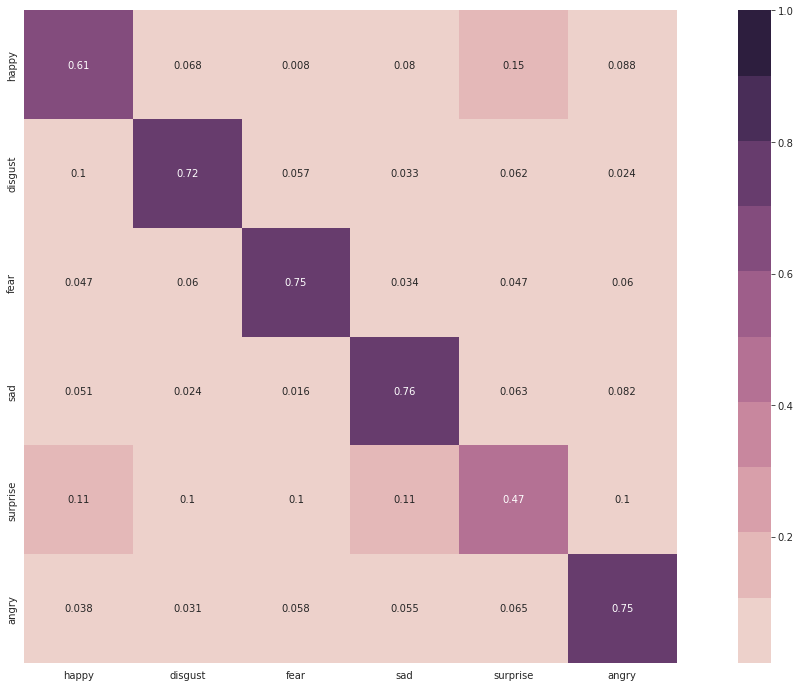

In [44]:
classifer = LogisticRegression()
classifer.fit(X_train, y_train)
y_pred = classifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(np.float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1, square=True, cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()
